# Imports

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [13]:
raw_df = gpd.read_file("datasets/3_combined/df.gpkg")
raw_df_with_age_gender_fe = gpd.read_file("datasets/4_fe/df_with_age_gender_fe.gpkg")
raw_df_with_full_fe = gpd.read_file("datasets/4_fe/df_with_full_fe.gpkg")

In [14]:
df = raw_df.copy()
df_with_age_gender_fe = raw_df_with_age_gender_fe.copy()
df_with_full_fe = raw_df_with_full_fe.copy()

# Define outliers

In [15]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Health

## Calculate outliers

In [16]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


## Plot outliers

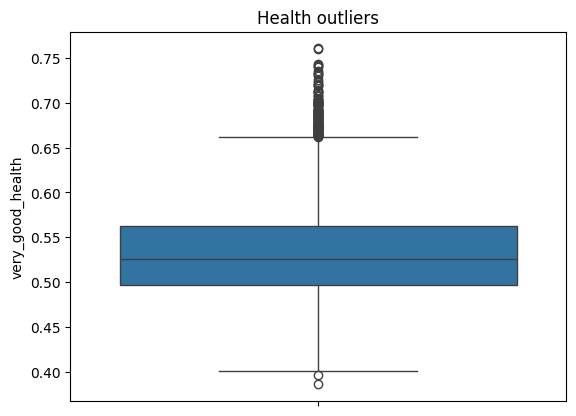

In [ ]:
sns.boxplot(y = df["very_good_health"])
plt.title("Health outliers")
plt.show()
plt.savefig("outputs/health_outliers.png")

## Plot distribution

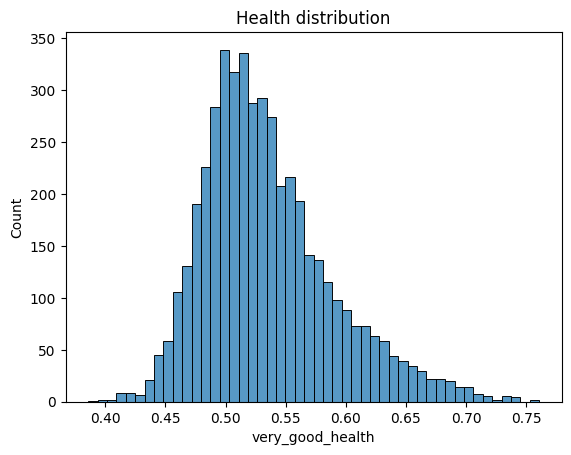

In [ ]:
sns.histplot(df["very_good_health"])
plt.title("Health distribution")
plt.show()
plt.savefig("outputs/health_distribution.png")

# Greenspace

## Calculate outliers

In [17]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


## Plot outliers

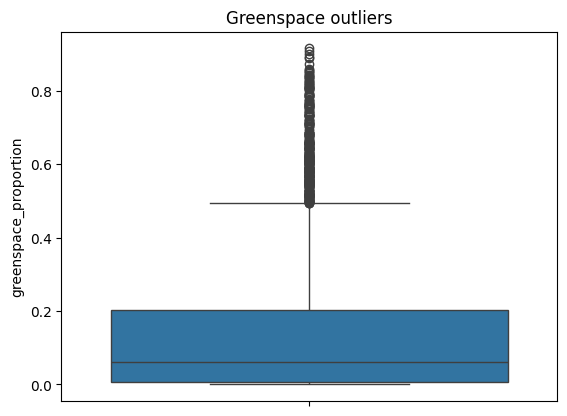

In [ ]:
sns.boxplot(df["greenspace_proportion"])
plt.title("Greenspace outliers")
plt.show()
plt.savefig("outputs/greenspace_outliers")

## Plot distribution

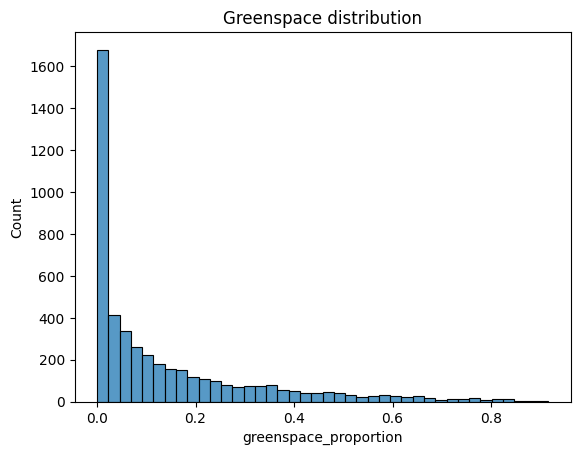

In [ ]:
sns.histplot(df["greenspace_proportion"])
plt.title("Greenspace distribution")
plt.show()
plt.savefig("greenspace_distribution")